# ボストン住宅価格の分析

## 最小二乗法での回帰

In [5]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


## リッジ回帰（Ridge Regression）

### 1. 基本的な位置づけ
リッジ回帰は **線形回帰の一種** です。通常の最小二乗法（OLS）は「誤差の二乗和を最小化する」方法ですが、リッジ回帰は **誤差の二乗和に「回帰係数の大きさを抑えるペナルティ（正則化項）」を加えたもの** を最小化します。

---

### 2. 数式
通常の線形回帰は次を最小化します：

$$
\min_{\beta} \; \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2
$$

ベクトル表記では：

$$
\min_{\beta} \; \| y - X\beta \|^2
$$

---

リッジ回帰ではこれに **L2正則化項** を加えます：

$$
\min_{\beta} \; \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

ベクトル表記では：

$$
\min_{\beta} \; \| y - X\beta \|^2 + \lambda \| \beta \|^2
$$

- \( y \)：目的変数ベクトル  
- \( X \)：説明変数の行列  
- \( \beta \)：回帰係数ベクトル  
- \( \lambda \)：正則化パラメータ（大きいほど係数が小さくなる）

---

### 3. 特徴
- **多重共線性**（説明変数同士の強い相関）に強い  
- **過学習防止**に効果がある  
- \(\lambda = 0\) のときは通常の最小二乗回帰と同じ  
- \(\lambda\) が大きいと係数はゼロに近づくが、完全にゼロにはならない（LASSOとの違い）  

---

### 4. メリット
- 推定が安定する（係数が暴走しない）  
- 汎化性能（未知データへの予測力）が高まる  

---

### 5. デメリット
- 係数がゼロにならないため、**変数選択**（不要な特徴量を自動で除外すること）はできない  
- 結果の解釈（どの変数が効いているか）はやや分かりにくくなる  

---

### 6. まとめ
リッジ回帰は「モデルの複雑さを制御する」ための手法です。  

- 多重共線性に強い  
- 過学習を防ぐ  
- ただし変数選択には向かない（→それはLASSO回帰が得意）  


In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


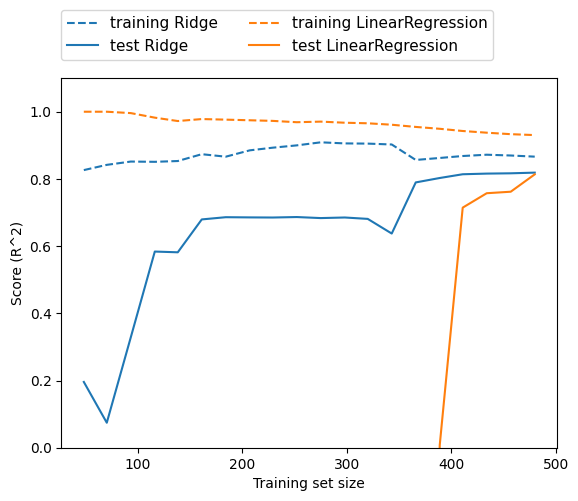

In [7]:
mglearn.plots.plot_ridge_n_samples()

## ラッソ回帰を使って分析する

## Lasso回帰（L1正則化付き回帰）

Lasso回帰（Least Absolute Shrinkage and Selection Operator 回帰）は、**線形回帰にL1正則化項を加えた回帰手法**です。特徴量選択の効果を持ちながら、過学習を防ぎつつモデルをシンプルにできるのが特徴です。

---

### 数式での定義

通常の線形回帰では、損失関数は次の二乗誤差です：

$$
L(\beta) = \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} x_{ij}\beta_j \right)^2
$$

Lasso回帰では、これに **L1正則化項** を加えます：

$$
L(\beta) = \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} x_{ij}\beta_j \right)^2
+ \lambda \sum_{j=1}^{p} \lvert \beta_j \rvert
$$

- \( \lambda \)：正則化パラメータ（大きいほど係数を小さくする力が強くなる）  
- \( \lvert \beta_j \rvert \)：係数の絶対値

---

### 特徴

- **特徴量選択ができる**  
  L1正則化の性質により、ある係数が**ちょうど0になる**ことがあります。  
  → 自動的に不要な特徴量を除外してくれる。

- **過学習を防ぐ**  
  モデルの複雑さを制御し、汎化性能を高められる。

- **リッジ回帰（L2正則化）との違い**  
  - リッジ回帰：係数を小さくするが、ゼロにはならない（縮小効果のみ）  
  - Lasso回帰：係数をゼロにできる（特徴量選択が可能）

---

### 利用シーン

- 多数の説明変数（特徴量）がある場合  
- 重要でない特徴量を自動的に削除したい場合  
- 解釈性を重視する場合（どの変数が効いているかを明確化）

---

### まとめ

- **Lasso回帰 = 線形回帰 + L1正則化**  
- 特徴量選択と過学習防止を同時に実現  
- 正則化パラメータ \(\lambda\) の調整が重要（クロスバリデーションで決めるのが一般的）



In [10]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


## クラス分類のための線形モデル

- 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
- 正規化を行うか。行うならどの方法を使うか。

## ロジスティック回帰 (Logistic Regression)

ロジスティック回帰は **分類問題**（特に2値分類）に用いられる手法で、  
入力データから **ある事象が起こる確率** を予測するモデルです。

---

### 数学的な定式化

まず特徴量の線形結合を考えます：

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$

これをそのまま出力にはせず、**シグモイド関数** に通します：

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### 確率の解釈

目的変数 \( y \in \{0,1\} \) に対して、

$$
P(y=1|x) = \sigma(z)
$$

$$
P(y=0|x) = 1 - \sigma(z)
$$

---

### 分類の基準

一般的には、

$$
P(y=1|x) \geq 0.5 \quad \Rightarrow \quad y = 1
$$

$$
P(y=1|x) < 0.5 \quad \Rightarrow \quad y = 0
$$

と分類します。（しきい値は調整可能）

---

### パラメータ推定

ロジスティック回帰では **最小二乗法** ではなく、  
**最尤推定法（Maximum Likelihood Estimation; MLE）** を用います。

対数尤度は次のように書けます：

$$
\ell(\beta) = \sum_{i=1}^n \Big( y_i \log(\sigma(z_i)) + (1-y_i) \log(1-\sigma(z_i)) \Big)
$$

---

### 応用例
- 医療：患者が病気である確率を予測  
- マーケティング：顧客が商品を購入する確率を予測  
- 金融：ローンの返済不能リスクを予測  

---

### まとめ
- ロジスティック回帰は **分類（確率予測）モデル**  
- 出力はシグモイド関数で **0〜1に収まる**  
- 学習には **最尤推定** を使う  
- 主に **2値分類** に利用される


## サポートベクターマシン (SVM) 概要

SVM は **分類**（と回帰）に使われる教師あり学習手法で、  
**サポートベクター（境界に最も近い点）との距離＝マージン**を最大化するように決定境界（超平面）を求めます。

---

### 決定関数と分類則

決定関数は

$$
f(x) = w^\top x + b
$$

分類は

$$
\text{sign}\big(f(x)\big) =
\begin{cases}
+1 & \text{if } f(x) > 0 \\
-1 & \text{if } f(x) < 0
\end{cases}
$$

---

### 点と超平面の距離

点 \(x_i\) と超平面 \(w^\top x + b = 0\) との距離は

$$
\mathrm{dist}(x_i) = \frac{\lvert w^\top x_i + b \rvert}{\lVert w \rVert_2}
$$

---

### サポートベクターと制約

ラベル \(y_i \in \{+1,-1\}\) を用いると、ハードマージン SVM の制約は

$$
y_i\,(w^\top x_i + b) \ge 1 \quad (\forall i)
$$

サポートベクターでは等号が成り立ちます：

$$
y_i\,(w^\top x_i + b) = 1
$$

---

### マージンと最適化

マージン幅は

$$
\text{Margin} = \frac{2}{\lVert w \rVert_2}
$$

よって **マージン最大化**は同値に **\(\lVert w \rVert_2\) の最小化**になり、最適化問題は

$$
\min_{w,b}\ \frac{1}{2}\,\lVert w \rVert_2^2
\quad \text{s.t. } y_i\,(w^\top x_i + b) \ge 1 \ \ (\forall i)
$$

---

### ソフトマージン（ノイズや重なりに対応）

一部の誤分類を許すためにスラック変数 \(\xi_i \ge 0\) を導入：

$$
\min_{w,b,\{\xi_i\}}\ \frac{1}{2}\,\lVert w \rVert_2^2 + C\sum_i \xi_i
\quad \text{s.t. } y_i\,(w^\top x_i + b) \ge 1 - \xi_i,\ \ \xi_i \ge 0
$$

- \(C\) が大きい：誤分類を強く嫌う（複雑になりやすい）  
- \(C\) が小さい：誤分類をある程度許す（単純で汎化しやすい）

---

### カーネルトリック（非線形分離）

写像 \(\phi(x)\) を明示せずに、カーネル \(K(x,x')=\phi(x)^\top \phi(x')\) を使って高次元で線形分離：

代表例：線形，多項式，RBF（ガウシアン）など。

学習後の決定関数は

$$
f(x) = \sum_{i \in SV} \alpha_i\, y_i\, K(x_i, x) + b
$$

（\(\alpha_i > 0\) の添字だけがサポートベクター）

---

### 直感まとめ

- **境界に最も近い点（サポートベクター）との距離**が同時に最大になるように境界を引く。  
- その距離（マージン）を最大化することが、未知データへの強さ（汎化）につながる。


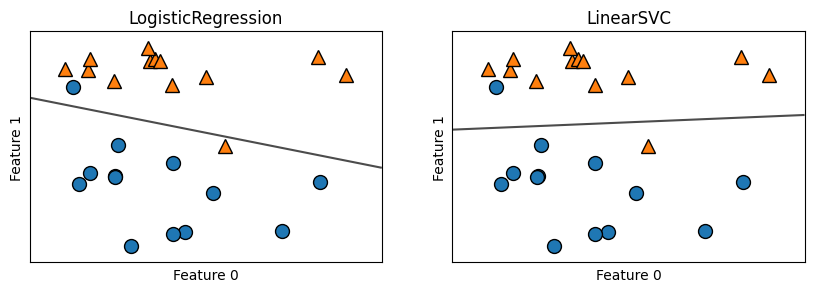

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
plt.show()

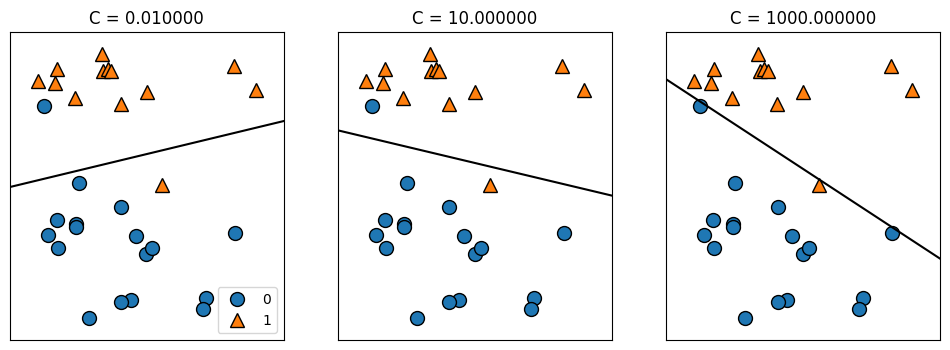

In [13]:
import mglearn

mglearn.plots.plot_linear_svc_regularization()